In [75]:
import numpy as np
import matplotlib.pyplot as plt

def dft_matricial(x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))

    W = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(W, x)

    return X



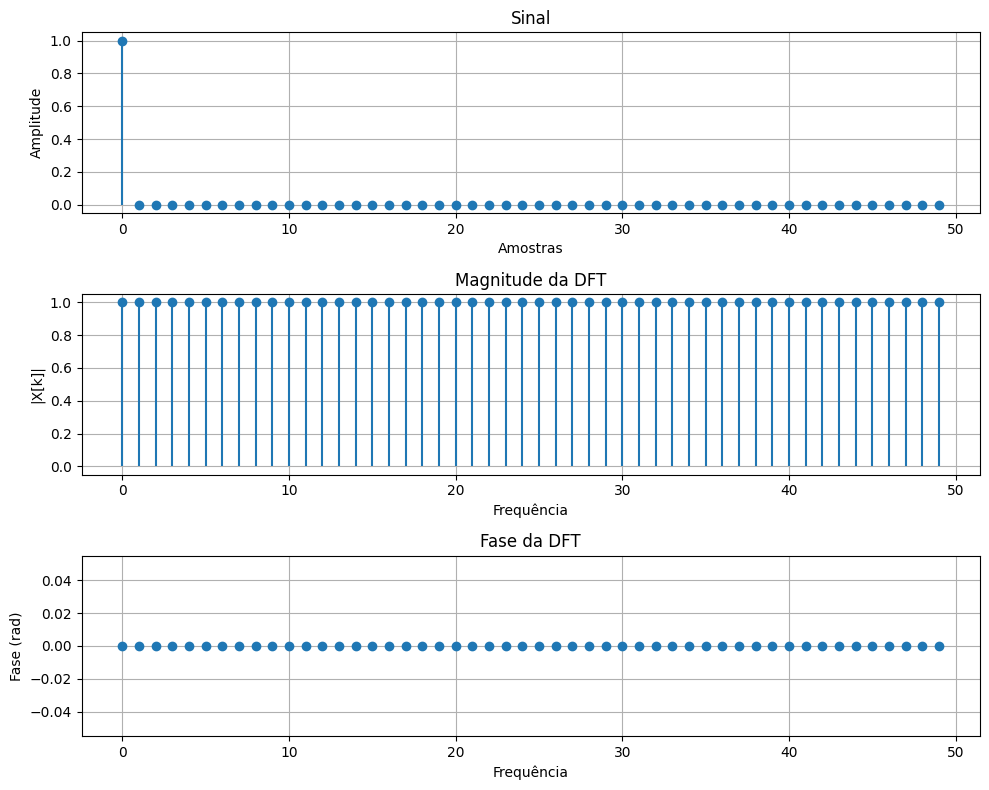

In [76]:
N = 50
x1 = np.zeros(N)
x1[0] = 1  # impulso em n = 0

X1 = dft_matricial(x1)
n = np.arange(N)

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.stem(n, x1, basefmt=" ")
plt.title(f'Sinal')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, np.abs(X1), basefmt=" ")
plt.title(f'Magnitude da DFT')
plt.xlabel('Frequência')
plt.ylabel('|X[k]|')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, np.angle(X1), basefmt=" ")
plt.title(f'Fase da DFT')
plt.xlabel('Frequência')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()

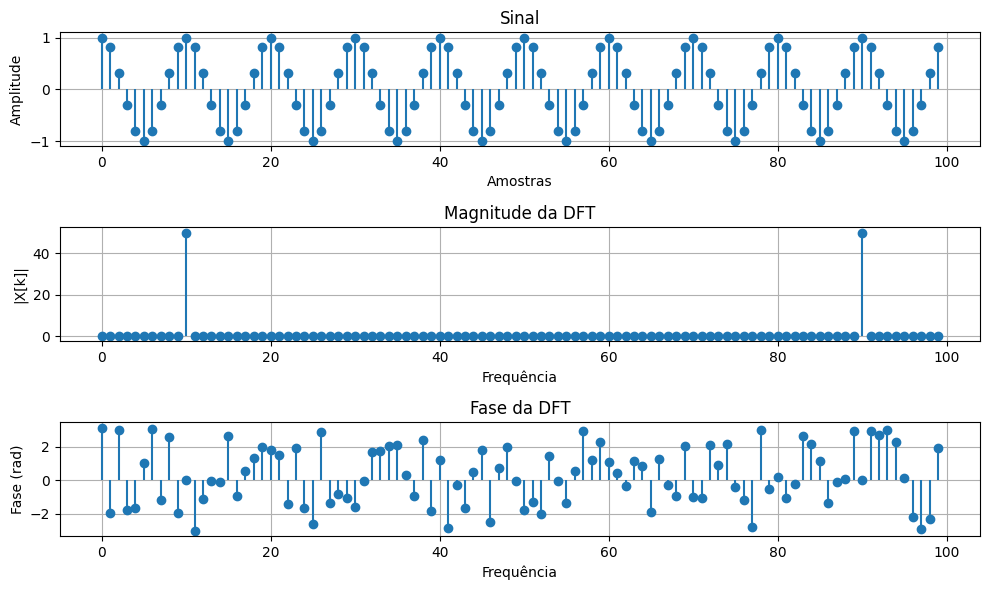

In [77]:
N = 100
n = np.arange(N)
f = 10
x3 = np.cos(2 * np.pi * f * n / N)

X3 = dft_matricial(x3)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(n, x3, basefmt=" ")
plt.title(f'Sinal')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, np.abs(X3), basefmt=" ")
plt.title(f'Magnitude da DFT')
plt.xlabel('Frequência')
plt.ylabel('|X[k]|')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, np.angle(X3), basefmt=" ")
plt.title(f'Fase da DFT')
plt.xlabel('Frequência')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Transformada Rápida de Fourier (FFT) por Decimação no Tempo

---

## **1. Fundamentação Teórica**

### **1.1. DFT Convencional**
A DFT de um sinal $x(n)$ de comprimento $N$ é dada por:
$$
X[k] = \sum_{n=0}^{N-1} x(n) W_N^{kn}, \quad \text{onde} \quad W_N = e^{-j 2\pi / N}
$$

Cálculo direto requer $N^2$ operações.

---

### **1.2. FFT**
A FFT por decimação no tempo divide o sinal em **subsequências pares e ímpares**, calculando DFTs menores e combinando os resultados.

#### **Divisão do Sinal**

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

Fazendo $n=2r$ e $n=2r+1$ em cada um dos somatórios, reescrevemos:

- **Índices pares**: $x_{\text{par}}(n) = x(2r)$
- **Índices ímpares**: $x_{\text{impar}}(n) = x(2r + 1)$

$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{2kr} + \sum\limits_{r=0}^{N/2-1}x(2r + 1)W_N^{(2r+1)k}$$
  
$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{kr} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r + 1)(W_N^2)^{kr}$$

Mas, $W_N^2 = W_{N/2}$ já que:

$$W_N^2 = e^{(-j2\pi/N)2} = e^{-j2\pi/(N/2)} = W_{N/2}$$

Então, podemos reescrever $X[k]$ como:

$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{kr} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r + 1)(W_{N/2})^{kr}$$

$$X[k] = G[k] + W_N^k H[k]$$
$$X[k + N/2] = G[k] - W_N^k H[k]$$

onde:

- G[k]: FFT dos pares
- H[k]: FFT dos impares

In [78]:
def zero_padding(sinal, potencia_de_2=True):

    N_original = len(sinal)
    
    if potencia_de_2:
        N_novo = 2 ** int(np.ceil(np.log2(N_original)))
    else:
        N_novo = N_original
    
    sinal_padded = np.zeros(N_novo, dtype=sinal.dtype)
    sinal_padded[:N_original] = sinal
    
    return sinal_padded
    
def fft_dec(x):

    N = len(x)

    if N == 1:
        return x

    pares = x[::2]
    impares = x[1::2]

    X_par = fft_dec(pares) # indices pares
    X_impar = fft_dec(impares) # indices ímpares

    k = np.arange(N // 2)
    W_N = np.exp(-2j * np.pi * k / N)

    X = np.zeros(N, dtype=np.complex128)
    X[:N//2] = X_par + W_N * X_impar
    X[N//2:] = X_par - W_N * X_impar

    return X


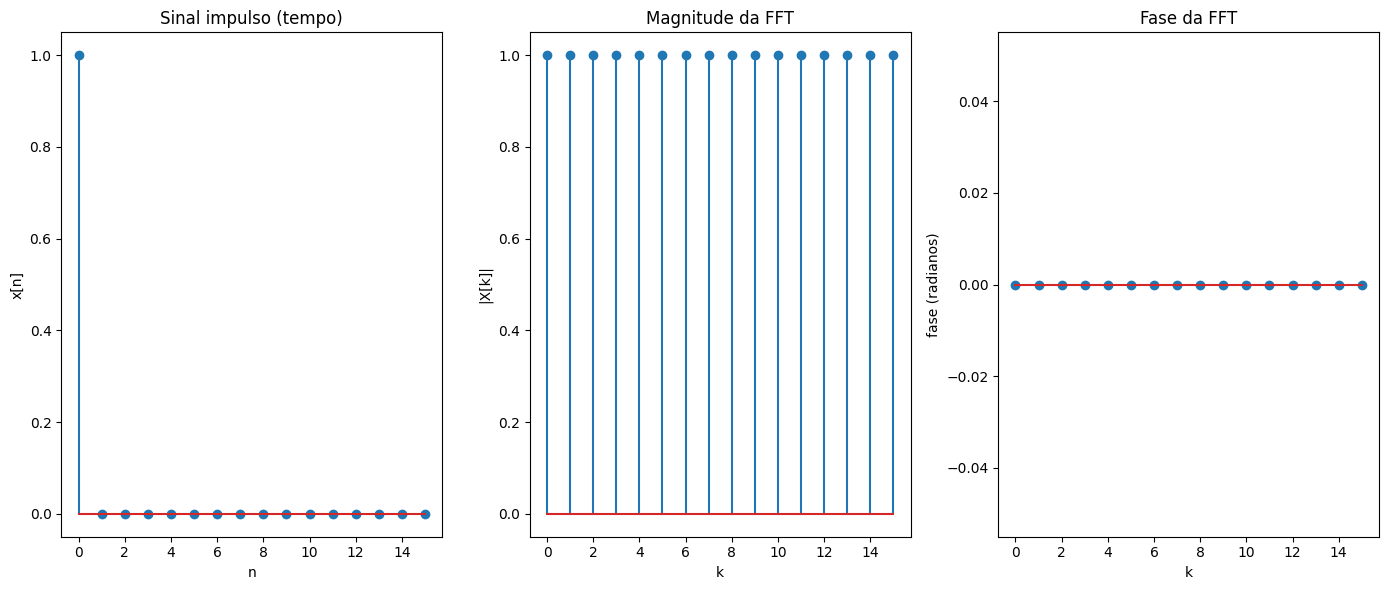

In [79]:
# Sinal impulso
x = np.zeros(10)
x[0] = 1

x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.stem(x_padded)
plt.title("Sinal impulso (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.subplot(1, 3, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(1, 3, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (radianos)")

plt.tight_layout()
plt.show()


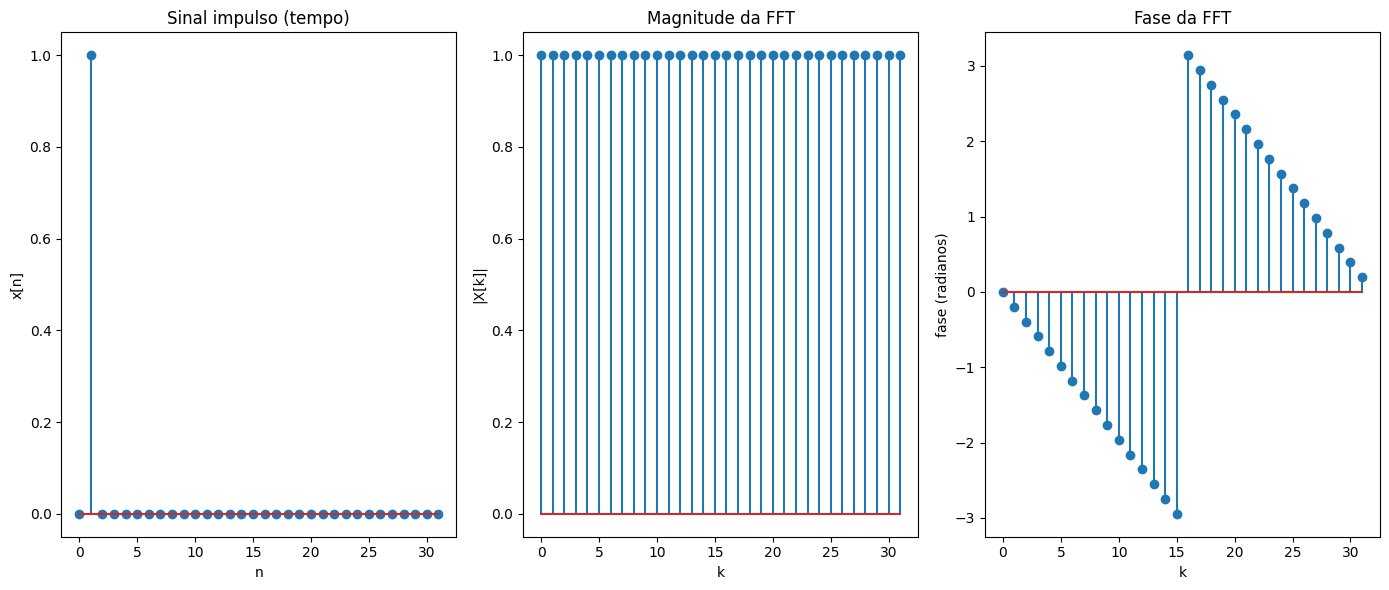

In [80]:
# Sinal impulsoc deslocad
x = np.zeros(20)
x[1] = 1

x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(14, 6))

# Sinal no tempo
plt.subplot(1, 3, 1)
plt.stem(x_padded)
plt.title("Sinal impulso (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")

# Magnitude da FFT
plt.subplot(1, 3, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

# Fase da FFT
plt.subplot(1, 3, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (radianos)")

plt.tight_layout()
plt.show()


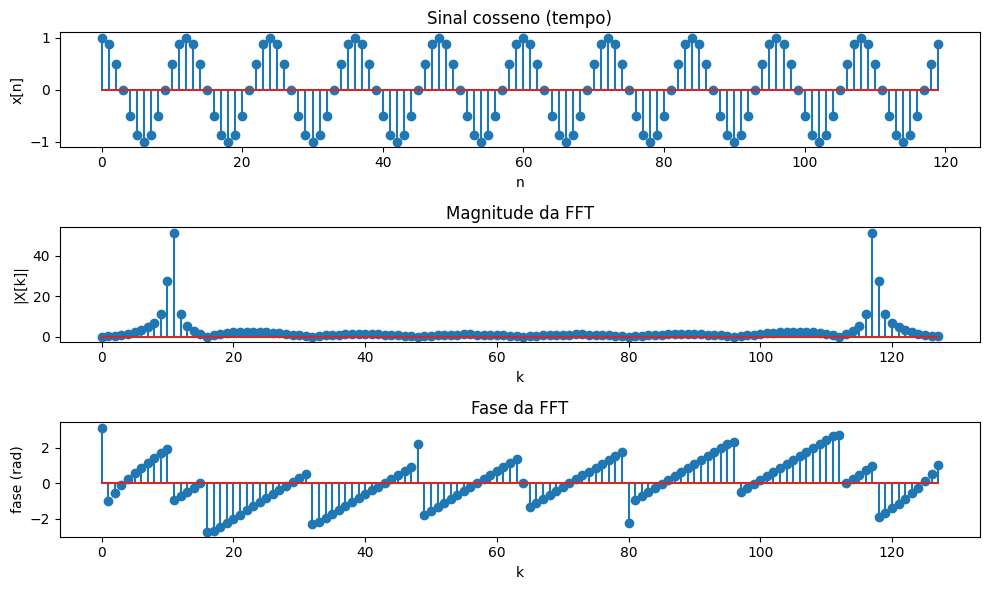

In [81]:
N = 120
f0 = 10
n = np.arange(N)
x = np.cos(2 * np.pi * f0 * n / N)


x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title("Sinal cosseno (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")


plt.subplot(3, 1, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 1, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (rad)")

plt.tight_layout()
plt.show()


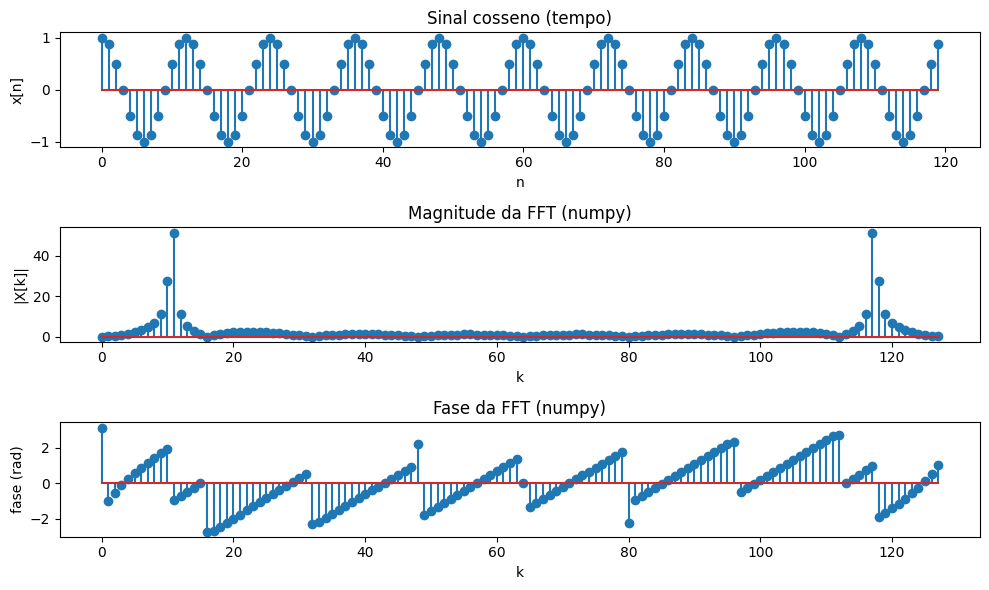

In [82]:
X = np.fft.fft(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title("Sinal cosseno (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")


plt.subplot(3, 1, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT (numpy)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 1, 3)
plt.stem(fase)
plt.title("Fase da FFT (numpy)")
plt.xlabel("k")
plt.ylabel("fase (rad)")

plt.tight_layout()
plt.show()


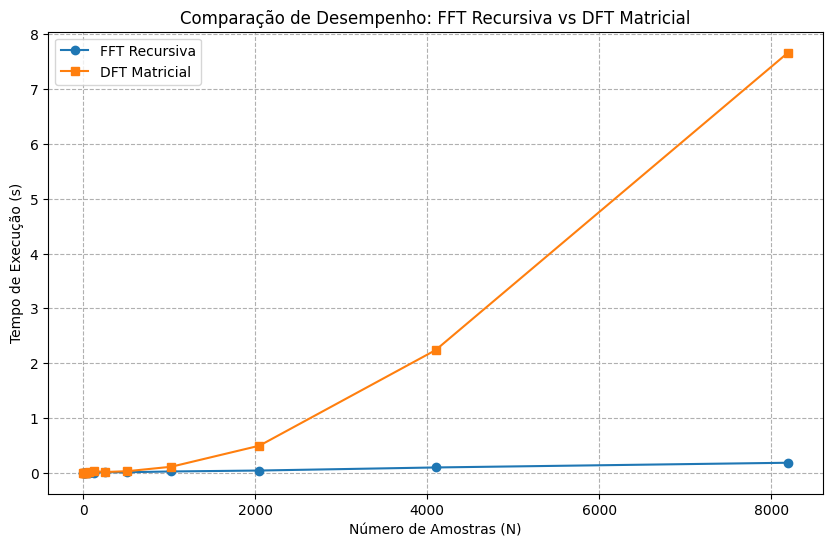

In [83]:
import time

np.random.seed(0)

def medir_tempo(funcao, entrada):
    inicio = time.time()
    funcao(entrada)
    fim = time.time()
    return fim - inicio

tamanhos = [2**n for n in range(1, 14)]

tempos_fft_dec = []
tempos_dft_matricial = []

for N in tamanhos:
    x = np.random.rand(N)
    
    tempo_fft = medir_tempo(fft_dec, x)
    tempos_fft_dec.append(tempo_fft)
  
    tempo_dft = medir_tempo(dft_matricial, x)
    tempos_dft_matricial.append(tempo_dft)

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_fft_dec, 'o-', label='FFT Recursiva')
plt.plot(tamanhos, tempos_dft_matricial, 's-', label='DFT Matricial')
plt.xlabel('Número de Amostras (N)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Comparação de Desempenho: FFT Recursiva vs DFT Matricial')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Reduzindo vazamento espectral com janelamento

In [112]:
def aplicar_janela(sinal, tipo='hamming'):
    """Aplica uma janela ao sinal para reduzir vazamento espectral."""
    N = len(sinal)
    if tipo == 'hamming':
        janela = np.hamming(N)
    elif tipo == 'hanning':
        janela = np.hanning(N)
    elif tipo == 'blackman':
        janela = np.blackman(N)
    elif tipo == 'bartlett':
        janela = np.bartlett(N)
    elif tipo == 'kaiser':
        janela = np.kaiser(N, 0)
    elif tipo == 'retangular':
        janela = np.ones(N)  # sem janela
    else:
        raise ValueError()
    return sinal * janela

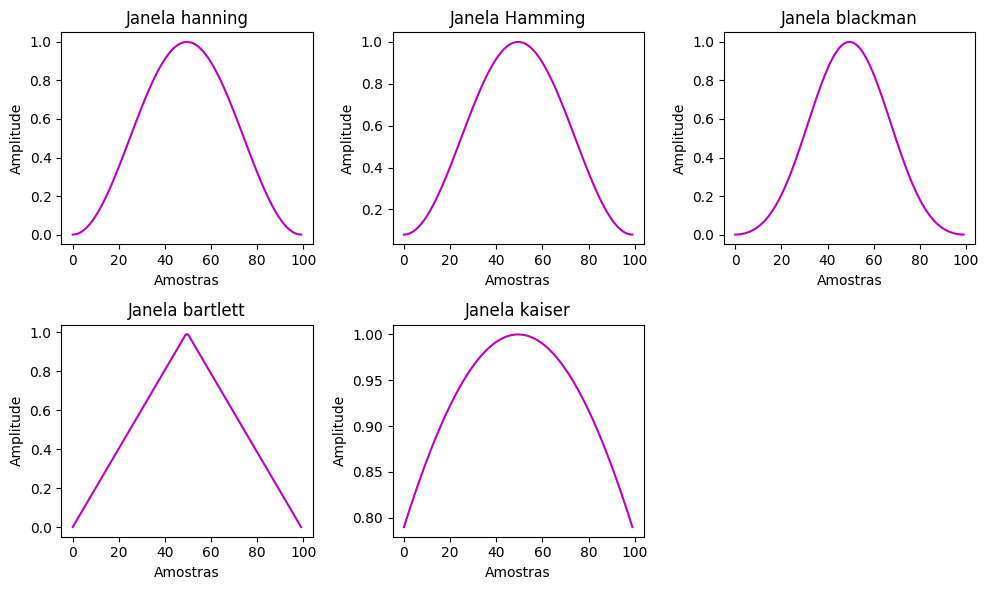

In [114]:
N = 100
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.plot(np.hanning(N), 'm')
plt.title('Janela hanning')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 2)
plt.plot(np.hamming(N), 'm')
plt.title('Janela Hamming')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 3)
plt.plot(np.blackman(N), 'm')
plt.title('Janela blackman')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 4)
plt.plot(np.bartlett(N), 'm')
plt.title('Janela bartlett')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 5)
plt.plot(np.kaiser(N, 1), 'm')
plt.title('Janela kaiser')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')


plt.tight_layout()

In [142]:
N = 60
f0 = 10
n = np.arange(N)
x = np.cos(2 * np.pi * f0 * n / N)
x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)

x_janelado_hamming = aplicar_janela(x, tipo='hamming')
x_janelado_hanning = aplicar_janela(x, tipo='hanning')
x_janelado_blackman = aplicar_janela(x, tipo='blackman')
x_janelado_bartlett = aplicar_janela(x, tipo='bartlett')
x_janelado_kaiser = aplicar_janela(x, tipo='kaiser')

x_padded_hamming= zero_padding(x_janelado_hamming, potencia_de_2=True)
X_janelado_hamming = fft_dec(x_padded_hamming)
magnitude_hamming = np.abs(X_janelado_hamming)

x_padded_hanning= zero_padding(x_janelado_hanning, potencia_de_2=True)
X_janelado_hanning = fft_dec(x_padded_hanning)
magnitude_hanning = np.abs(X_janelado_hanning)

x_padded_blackman= zero_padding(x_janelado_blackman, potencia_de_2=True)
X_janelado_blackman = fft_dec(x_padded_blackman)
magnitude_blackman = np.abs(X_janelado_blackman)

x_padded_bartlett= zero_padding(x_janelado_bartlett, potencia_de_2=True)
X_janelado_bartlett = fft_dec(x_padded_bartlett)
magnitude_bartlett = np.abs(X_janelado_bartlett)

x_padded_kaiser= zero_padding(x_janelado_kaiser, potencia_de_2=True)
X_janelado_kaiser = fft_dec(x_padded_kaiser)
magnitude_kaiser = np.abs(X_janelado_kaiser)

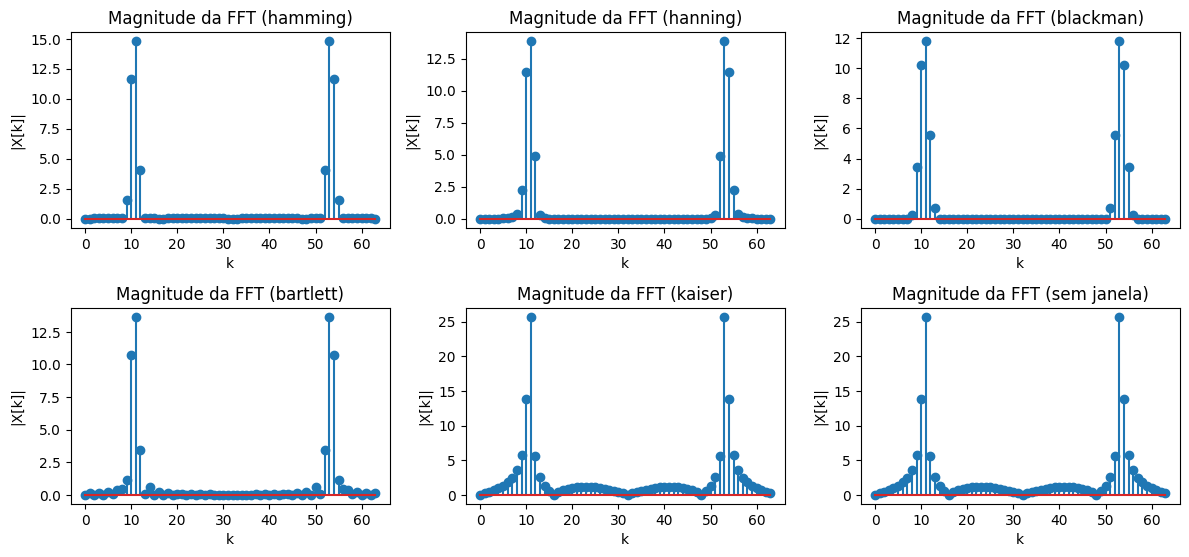

In [143]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.stem(magnitude_hamming)
plt.title("Magnitude da FFT (hamming)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 3, 2)
plt.stem(magnitude_hanning)
plt.title("Magnitude da FFT (hanning)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 3, 3)
plt.stem(magnitude_blackman)
plt.title("Magnitude da FFT (blackman)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 3, 4)
plt.stem(magnitude_bartlett)
plt.title("Magnitude da FFT (bartlett)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 3, 5)
plt.stem(magnitude_kaiser)
plt.title("Magnitude da FFT (kaiser)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(3, 3, 6)
plt.stem(magnitude)
plt.title("Magnitude da FFT (sem janela)")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.tight_layout()

In [ ]:
fs = 1000  # Frequência de amostragem (Hz)
T = 1.0 / fs
f0 = 50  # Frequência do sinal (Hz)
N = 100  # Número de amostras

n = np.arange(N)
x = np.cos(2 * np.pi * f0 * n * T)

In [153]:
x_windowed = aplicar_janela(x, tipo='hamming')
x_padded = zero_padding(x_windowed)
X = fft_dec(x_padded)
N_padded = len(x_padded)
freq = np.fft.fftfreq(N_padded, T)

magnitude = np.abs(X)
fase = np.angle(X)

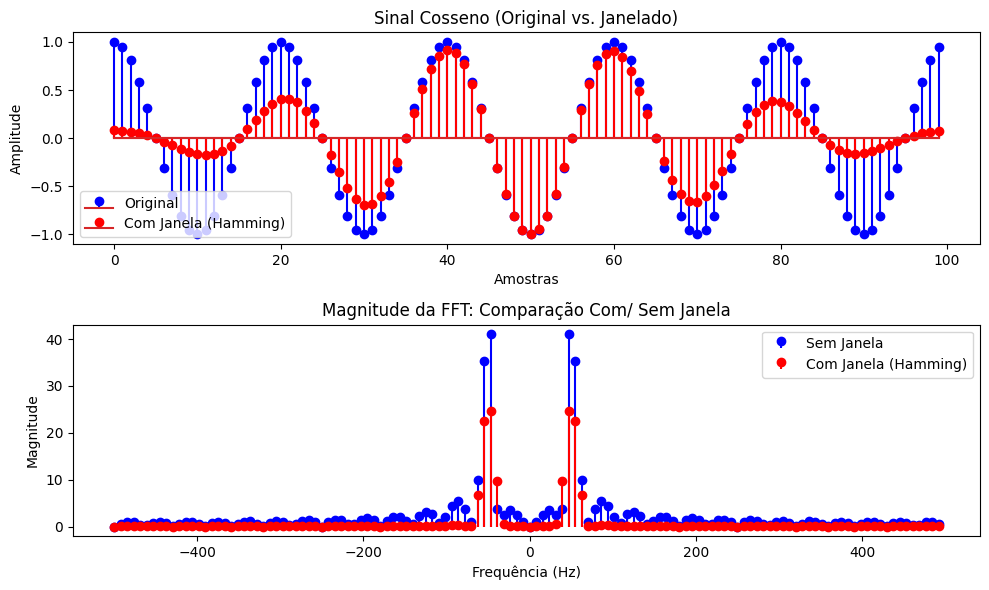

In [158]:
plt.figure(figsize=(10, 6))

# Sinal original e janelado
plt.subplot(2, 1, 1)
plt.stem(n, x, 'b', label='Original')
plt.stem(n, x_windowed, 'r', label='Com Janela (Hamming)')
plt.title('Sinal Cosseno (Original vs. Janelado)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()

# Magnitude da FFT (sem janela)
x_padded_sem_janela = zero_padding(x)
X_sem_janela = fft_dec(x_padded_sem_janela)
magnitude_sem_janela = np.abs(X_sem_janela)

plt.subplot(2, 1, 2)
plt.stem(freq, magnitude_sem_janela, 'b', markerfmt='bo', basefmt=" ", label='Sem Janela')
plt.stem(freq, magnitude, 'r', markerfmt='ro', basefmt=" ", label='Com Janela (Hamming)')
plt.title('Magnitude da FFT: Comparação Com/ Sem Janela')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()